In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from deap import base, creator, tools, algorithms

# Load the channel matrix from CSV file
C_full = pd.read_csv('/content/drive/MyDrive/finalyr/channel_matrix.csv', header=None).values  # Load as a NumPy array
R_full = pd.read_csv('/content/drive/MyDrive/finalyr/reward_matrix.csv', header=None).values    # Load as a NumPy array

# Extract the first 10x10 submatrices
C = C_full[:10, :10]  # Channel matrix (10x10)
R = R_full[:10, :10]  # Reward matrix (10x10)

# Normalize the reward matrix R to the range [0, 1]
R_normalized = R / 100.0

# Define a function to calculate the proportional fairness objective
def calculate_proportional_fairness(C, R):
    P = np.multiply(C, R)
    non_zero_rewards = P[C == 1]

    # Handle the case where non_zero_rewards is empty
    if non_zero_rewards.size == 0:
        print("Warning: No active channels with positive rewards found.")
        return 0  # Return zero or a very small number to avoid NaN

    non_zero_rewards = np.where(non_zero_rewards == 0, 1e-10, non_zero_rewards)

    # Calculate the sum of logarithms for proportional fairness
    return np.sum(np.log(non_zero_rewards))

# Define the fitness function
def fitness(individual):
    R_individual = np.array(individual).reshape(10, 10)  # Reshape to 10x10
    proportional_fairness = calculate_proportional_fairness(C, R_individual * 100)  # Scale back to [1, 100]
    return (proportional_fairness,)

# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.rand)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=10*10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Define the population size and number of generations
population = toolbox.population(n=100)
ngen = 50  # Number of generations
cxpb = 0.5  # Crossover probability
mutpb = 0.2  # Mutation probability

# Run the genetic algorithm
result = algorithms.eaSimple(population, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, verbose=False)

# Extract the best individual
best_individual = tools.selBest(population, k=1)[0]
best_individual_matrix = np.array(best_individual).reshape(10, 10) * 100  # Rescale to [1, 100]

# Calculate the final product matrix and proportional fairness
final_product_matrix = np.multiply(C, best_individual_matrix)
final_proportional_fairness = calculate_proportional_fairness(C, best_individual_matrix)

# Output results
print("Channel matrix C:\n", C)
print("Initial Reward matrix R:\n", R)
print("Optimized Reward matrix R_final (Proportional Fairness - Genetic Algorithm):\n", best_individual_matrix)
print("Final product matrix:\n", final_product_matrix)
print("Final proportional fairness (sum of logs):", final_proportional_fairness)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
<ipython-input-6-2c3ea5fa37f6>:29: RuntimeWarning: invalid value encountered in log
  return np.sum(np.log(non_zero_rewards))


Channel matrix C:
 [[0 1 0 0 0 1 0 0 0 1]
 [0 1 1 1 1 1 1 1 1 0]
 [0 1 0 0 1 0 1 1 1 0]
 [0 0 0 1 1 0 1 1 1 1]
 [1 1 0 0 1 1 1 1 1 1]
 [0 0 0 1 0 0 1 0 1 1]
 [0 1 1 1 0 0 0 1 1 1]
 [1 1 0 1 0 0 1 1 1 1]
 [0 1 0 0 1 1 1 0 1 0]
 [0 1 1 0 0 1 1 0 0 1]]
Initial Reward matrix R:
 [[51 71 96 48 19  6 84 27 53 48]
 [26 38 38 61 44 86 44 74 62  6]
 [30 54 13 83 29  3 90 58 76  2]
 [15 38 15  5 93 83 54 51 10 12]
 [95 44 31 58 87 53 84 79 23 28]
 [18 47 70 57 93 19 97 65  3 42]
 [49  1 10 47 59 96 62 86 18 46]
 [17  7 13 66  4 10 88 17 52  6]
 [25 12 71 39 17 45 11 70 23 91]
 [91 36 75 82 65 63 99 35 31 28]]
Optimized Reward matrix R_final (Proportional Fairness - Genetic Algorithm):
 [[ 6.50862361e+01  9.91039071e+01  7.34486025e+01  3.27205552e+01
   3.76872818e+01  9.30966427e+01  9.07855054e+01  4.63308314e+01
   6.84640803e+01  4.87904072e+01]
 [ 8.93347431e-01  6.33595050e+01  1.05744454e+02  7.81882419e+01
   8.05918672e+01  7.45672824e+01  9.21278213e+01  1.15409342e+02
   6.90005817e+0

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
<ipython-input-7-33050f2f4150>:30: RuntimeWarning: invalid value encountered in log
  return np.sum(np.log(non_zero_rewards))


Channel matrix C:
 [[0 1 0 0 0 1 0 0 0 1]
 [0 1 1 1 1 1 1 1 1 0]
 [0 1 0 0 1 0 1 1 1 0]
 [0 0 0 1 1 0 1 1 1 1]
 [1 1 0 0 1 1 1 1 1 1]
 [0 0 0 1 0 0 1 0 1 1]
 [0 1 1 1 0 0 0 1 1 1]
 [1 1 0 1 0 0 1 1 1 1]
 [0 1 0 0 1 1 1 0 1 0]
 [0 1 1 0 0 1 1 0 0 1]]
Initial Reward matrix R:
 [[51 71 96 48 19  6 84 27 53 48]
 [26 38 38 61 44 86 44 74 62  6]
 [30 54 13 83 29  3 90 58 76  2]
 [15 38 15  5 93 83 54 51 10 12]
 [95 44 31 58 87 53 84 79 23 28]
 [18 47 70 57 93 19 97 65  3 42]
 [49  1 10 47 59 96 62 86 18 46]
 [17  7 13 66  4 10 88 17 52  6]
 [25 12 71 39 17 45 11 70 23 91]
 [91 36 75 82 65 63 99 35 31 28]]
Optimized Reward matrix R_final (Proportional Fairness - Genetic Algorithm):
 [[100.82525979  73.49549359 -46.19235444  91.70077223  63.01905265
   98.76167911  36.3189766  107.40745503  10.87446616  39.12469452]
 [ 23.61764485  55.98221444 133.00082136  75.71286534  69.55327167
   90.42459829  85.15445577 125.80380132  90.1133182   30.23144194]
 [ 74.7520102  106.6902085   10.79235713  10.

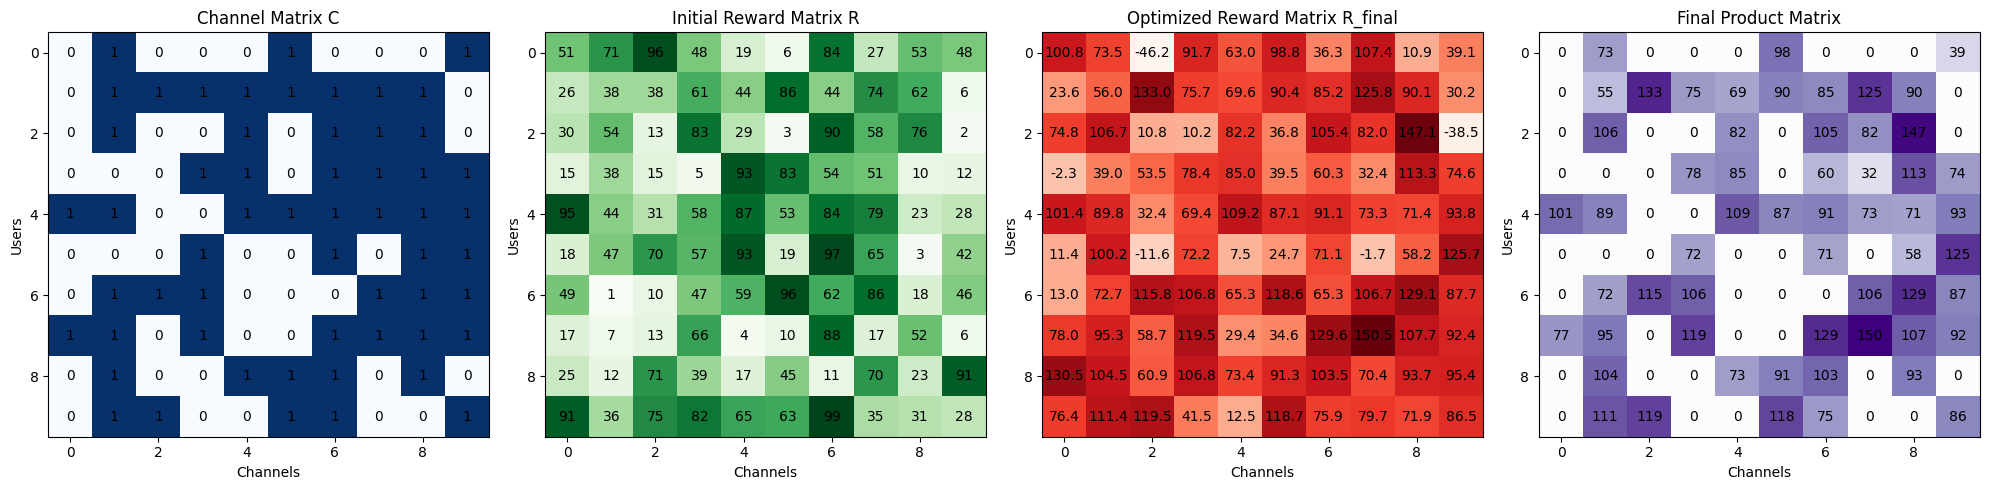

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from deap import base, creator, tools, algorithms

# Load the channel matrix from CSV file
C_full = pd.read_csv('/content/drive/MyDrive/finalyr/channel_matrix.csv', header=None).values  # Load as a NumPy array
R_full = pd.read_csv('/content/drive/MyDrive/finalyr/reward_matrix.csv', header=None).values    # Load as a NumPy array

# Extract the first 10x10 submatrices
C = C_full[:10, :10]  # Channel matrix (10x10)
R = R_full[:10, :10]  # Reward matrix (10x10)

# Normalize the reward matrix R to the range [0, 1]
R_normalized = R / 100.0

# Define a function to calculate the proportional fairness objective
def calculate_proportional_fairness(C, R):
    P = np.multiply(C, R)
    non_zero_rewards = P[C == 1]

    # Handle the case where non_zero_rewards is empty
    if non_zero_rewards.size == 0:
        print("Warning: No active channels with positive rewards found.")
        return 0  # Return zero or a very small number to avoid NaN

    non_zero_rewards = np.where(non_zero_rewards == 0, 1e-10, non_zero_rewards)

    # Calculate the sum of logarithms for proportional fairness
    return np.sum(np.log(non_zero_rewards))

# Define the fitness function
def fitness(individual):
    R_individual = np.array(individual).reshape(10, 10)  # Reshape to 10x10
    proportional_fairness = calculate_proportional_fairness(C, R_individual * 100)  # Scale back to [1, 100]
    return (proportional_fairness,)

# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.rand)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=10*10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Define the population size and number of generations
population = toolbox.population(n=100)
ngen = 50  # Number of generations
cxpb = 0.5  # Crossover probability
mutpb = 0.2  # Mutation probability

# Run the genetic algorithm
result = algorithms.eaSimple(population, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, verbose=False)

# Extract the best individual
best_individual = tools.selBest(population, k=1)[0]
best_individual_matrix = np.array(best_individual).reshape(10, 10) * 100  # Rescale to [1, 100]

# Calculate the final product matrix and proportional fairness
final_product_matrix = np.multiply(C, best_individual_matrix)
final_proportional_fairness = calculate_proportional_fairness(C, best_individual_matrix)

# Output results
print("Channel matrix C:\n", C)
print("Initial Reward matrix R:\n", R)
print("Optimized Reward matrix R_final (Proportional Fairness - Genetic Algorithm):\n", best_individual_matrix)
print("Final product matrix:\n", final_product_matrix)
print("Final proportional fairness (sum of logs):", final_proportional_fairness)

# Plotting the matrices
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot Channel Matrix C
axs[0].imshow(C, cmap='Blues', aspect='auto')
axs[0].set_title('Channel Matrix C')
axs[0].set_xlabel('Channels')
axs[0].set_ylabel('Users')
for (i, j), val in np.ndenumerate(C):
    axs[0].text(j, i, int(val), ha='center', va='center', color='black')

# Plot Initial Reward Matrix R
axs[1].imshow(R, cmap='Greens', aspect='auto')
axs[1].set_title('Initial Reward Matrix R')
axs[1].set_xlabel('Channels')
axs[1].set_ylabel('Users')
for (i, j), val in np.ndenumerate(R):
    axs[1].text(j, i, int(val), ha='center', va='center', color='black')

# Plot Optimized Reward Matrix R_final
axs[2].imshow(best_individual_matrix, cmap='Reds', aspect='auto')
axs[2].set_title('Optimized Reward Matrix R_final')
axs[2].set_xlabel('Channels')
axs[2].set_ylabel('Users')
for (i, j), val in np.ndenumerate(best_individual_matrix):
    axs[2].text(j, i, f"{val:.1f}", ha='center', va='center', color='black')

# Plot Final Product Matrix
axs[3].imshow(final_product_matrix, cmap='Purples', aspect='auto')
axs[3].set_title('Final Product Matrix')
axs[3].set_xlabel('Channels')
axs[3].set_ylabel('Users')
for (i, j), val in np.ndenumerate(final_product_matrix):
    axs[3].text(j, i, int(val), ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Channel matrix C:
 [[0 1 0 0 0 1 0 0 0 1]
 [0 1 1 1 1 1 1 1 1 0]
 [0 1 0 0 1 0 1 1 1 0]
 [0 0 0 1 1 0 1 1 1 1]
 [1 1 0 0 1 1 1 1 1 1]
 [0 0 0 1 0 0 1 0 1 1]
 [0 1 1 1 0 0 0 1 1 1]
 [1 1 0 1 0 0 1 1 1 1]
 [0 1 0 0 1 1 1 0 1 0]
 [0 1 1 0 0 1 1 0 0 1]]
Initial Reward matrix R:
 [[51 71 96 48 19  6 84 27 53 48]
 [26 38 38 61 44 86 44 74 62  6]
 [30 54 13 83 29  3 90 58 76  2]
 [15 38 15  5 93 83 54 51 10 12]
 [95 44 31 58 87 53 84 79 23 28]
 [18 47 70 57 93 19 97 65  3 42]
 [49  1 10 47 59 96 62 86 18 46]
 [17  7 13 66  4 10 88 17 52  6]
 [25 12 71 39 17 45 11 70 23 91]
 [91 36 75 82 65 63 99 35 31 28]]
Optimized Reward matrix R_final (Proportional Fairness - Genetic Algorithm):
 [[107.42603913 121.52680864  67.78937503  84.90108423  67.46627681
   91.96277539  57.56168911  62.50036794  28.03395656  86.74306671]
 [  4.65305598 102.45094075  93.86870096 106.52426362 100.27079892
  116.54446821  39.19983067  96.1579185   96.71453586  39.79506481]
 [ 44.22419635 116.45913105  42.19410599  18.

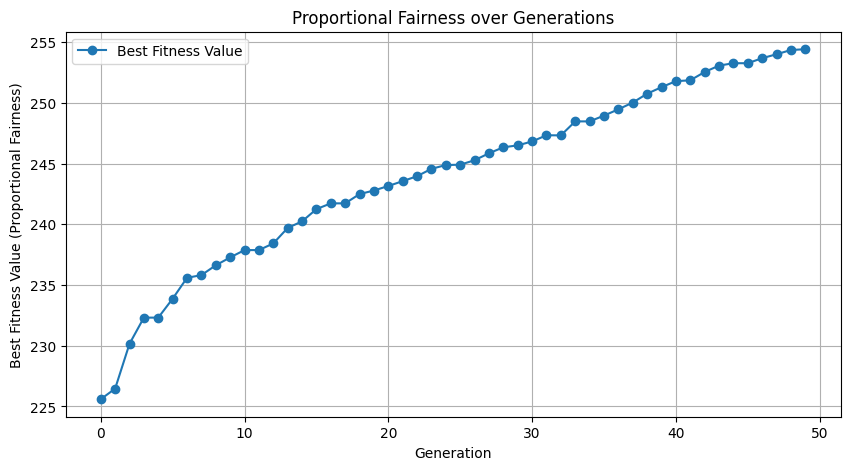

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from deap import base, creator, tools, algorithms

# Load the channel matrix from CSV file
C_full = pd.read_csv('/content/drive/MyDrive/finalyr/channel_matrix.csv', header=None).values  # Load as a NumPy array
R_full = pd.read_csv('/content/drive/MyDrive/finalyr/reward_matrix.csv', header=None).values    # Load as a NumPy array

# Extract the first 10x10 submatrices
C = C_full[:10, :10]  # Channel matrix (10x10)
R = R_full[:10, :10]  # Reward matrix (10x10)

# Normalize the reward matrix R to the range [0, 1]
R_normalized = R / 100.0

# Define a function to calculate the proportional fairness objective
def calculate_proportional_fairness(C, R):
    P = np.multiply(C, R)
    non_zero_rewards = P[C == 1]

    # Handle the case where non_zero_rewards is empty
    if non_zero_rewards.size == 0:
        print("Warning: No active channels with positive rewards found.")
        return 0  # Return zero or a very small number to avoid NaN

    # Replace zero values in non_zero_rewards with a small positive value to avoid log(0)
    non_zero_rewards = np.where(non_zero_rewards <= 0, 1e-10, non_zero_rewards)

    # Calculate the sum of logarithms for proportional fairness
    return np.sum(np.log(non_zero_rewards))

# Define the fitness function
def fitness(individual):
    R_individual = np.array(individual).reshape(10, 10)  # Reshape to 10x10
    proportional_fairness = calculate_proportional_fairness(C, R_individual * 100)  # Scale back to [1, 100]
    return (proportional_fairness,)

# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.rand)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=10*10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Define the population size and number of generations
population = toolbox.population(n=100)
ngen = 50  # Number of generations
cxpb = 0.5  # Crossover probability
mutpb = 0.2  # Mutation probability

# List to store the best fitness value in each generation
fitness_values = []

# Run the genetic algorithm and record fitness values
for gen in range(ngen):
    # Apply the algorithm for one generation
    algorithms.eaSimple(population, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=1, verbose=False)

    # Get the best fitness value in the current generation
    fits = [ind.fitness.values[0] for ind in population]
    best_fitness = max(fits)
    fitness_values.append(best_fitness)

# Extract the best individual
best_individual = tools.selBest(population, k=1)[0]
best_individual_matrix = np.array(best_individual).reshape(10, 10) * 100  # Rescale to [1, 100]

# Calculate the final product matrix and proportional fairness
final_product_matrix = np.multiply(C, best_individual_matrix)
final_proportional_fairness = calculate_proportional_fairness(C, best_individual_matrix)

# Output results
print("Channel matrix C:\n", C)
print("Initial Reward matrix R:\n", R)
print("Optimized Reward matrix R_final (Proportional Fairness - Genetic Algorithm):\n", best_individual_matrix)
print("Final product matrix:\n", final_product_matrix)
print("Final proportional fairness (sum of logs):", final_proportional_fairness)

# Plotting the fitness values over generations
plt.figure(figsize=(10, 5))
plt.plot(fitness_values, label='Best Fitness Value', marker='o')
plt.title('Proportional Fairness over Generations')
plt.xlabel('Generation')
plt.ylabel('Best Fitness Value (Proportional Fairness)')
plt.grid(True)
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Channel matrix C:
 [[0 1 0 0 0 1 0 0 0 1]
 [0 1 1 1 1 1 1 1 1 0]
 [0 1 0 0 1 0 1 1 1 0]
 [0 0 0 1 1 0 1 1 1 1]
 [1 1 0 0 1 1 1 1 1 1]
 [0 0 0 1 0 0 1 0 1 1]
 [0 1 1 1 0 0 0 1 1 1]
 [1 1 0 1 0 0 1 1 1 1]
 [0 1 0 0 1 1 1 0 1 0]
 [0 1 1 0 0 1 1 0 0 1]]
Initial Reward matrix R:
 [[51 71 96 48 19  6 84 27 53 48]
 [26 38 38 61 44 86 44 74 62  6]
 [30 54 13 83 29  3 90 58 76  2]
 [15 38 15  5 93 83 54 51 10 12]
 [95 44 31 58 87 53 84 79 23 28]
 [18 47 70 57 93 19 97 65  3 42]
 [49  1 10 47 59 96 62 86 18 46]
 [17  7 13 66  4 10 88 17 52  6]
 [25 12 71 39 17 45 11 70 23 91]
 [91 36 75 82 65 63 99 35 31 28]]
Optimized Reward matrix R_final (Proportional Fairness - Genetic Algorithm):
 [[ 84.55011893  91.38033434  41.14371679  42.19366741  34.28274048
   96.34002128  54.96849074  77.9828486  107.25572458  58.10211504]
 [ 26.77381725 104.85077094  87.38117047 120.74865563  51.87732663
  118.27030311  55.81818416  69.9792366  100.63287476  58.09660074]
 [ 72.84353767 118.1044354   78.44007741  32.

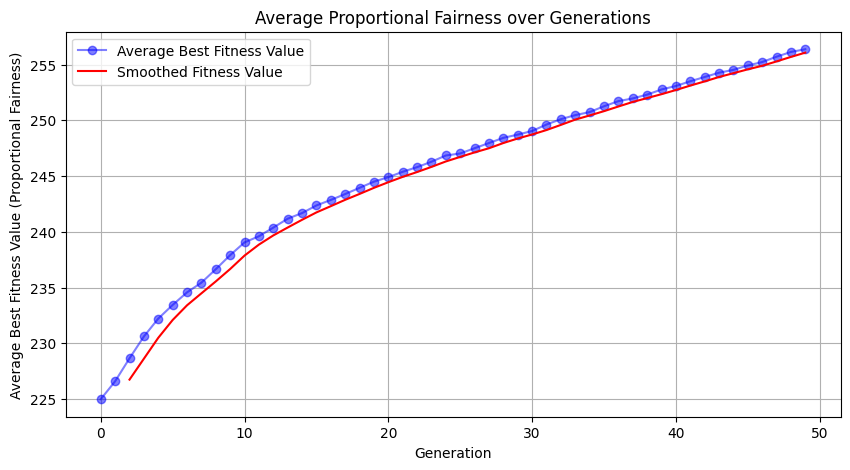

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from deap import base, creator, tools, algorithms

# Load the channel matrix from CSV file
C_full = pd.read_csv('/content/drive/MyDrive/finalyr/channel_matrix.csv', header=None).values  # Load as a NumPy array
R_full = pd.read_csv('/content/drive/MyDrive/finalyr/reward_matrix.csv', header=None).values    # Load as a NumPy array

# Extract the first 10x10 submatrices
C = C_full[:10, :10]  # Channel matrix (10x10)
R = R_full[:10, :10]  # Reward matrix (10x10)

# Normalize the reward matrix R to the range [0, 1]
R_normalized = R / 100.0

# Define a function to calculate the proportional fairness objective
def calculate_proportional_fairness(C, R):
    P = np.multiply(C, R)
    non_zero_rewards = P[C == 1]

    # Handle the case where non_zero_rewards is empty
    if non_zero_rewards.size == 0:
        print("Warning: No active channels with positive rewards found.")
        return 0  # Return zero or a very small number to avoid NaN

    # Replace zero values in non_zero_rewards with a small positive value to avoid log(0)
    non_zero_rewards = np.where(non_zero_rewards <= 0, 1e-10, non_zero_rewards)

    # Calculate the sum of logarithms for proportional fairness
    return np.sum(np.log(non_zero_rewards))

# Define the fitness function
def fitness(individual):
    R_individual = np.array(individual).reshape(10, 10)  # Reshape to 10x10
    proportional_fairness = calculate_proportional_fairness(C, R_individual * 100)  # Scale back to [1, 100]
    return (proportional_fairness,)

# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.rand)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=10*10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Define the population size and number of generations
population_size = 100
ngen = 50  # Number of generations
num_trials = 20  # Number of trials per generation
cxpb = 0.5  # Crossover probability
mutpb = 0.2  # Mutation probability

# List to store the average best fitness value in each generation
average_fitness_values = []

# Run the genetic algorithm for multiple trials
for trial in range(num_trials):
    # Create a fresh population for each trial
    population = toolbox.population(n=population_size)

    # List to store the best fitness value in each generation for this trial
    fitness_values = []

    # Run the genetic algorithm for the specified number of generations
    for gen in range(ngen):
        # Apply the algorithm for one generation
        algorithms.eaSimple(population, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=1, verbose=False)

        # Get the best fitness value in the current generation
        fits = [ind.fitness.values[0] for ind in population]
        best_fitness = max(fits)
        fitness_values.append(best_fitness)

    # If it's the first trial, initialize average_fitness_values
    if trial == 0:
        average_fitness_values = fitness_values
    else:
        # Accumulate fitness values for averaging later
        average_fitness_values = [avg + fit for avg, fit in zip(average_fitness_values, fitness_values)]

# Average the fitness values across all trials
average_fitness_values = [fit / num_trials for fit in average_fitness_values]

# Function to calculate a simple moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Calculate moving averages
window_size = 3  # You can adjust this for smoother results
smoothed_fitness_values = moving_average(average_fitness_values, window_size)

# Extract the best individual from the last trial
best_individual = tools.selBest(population, k=1)[0]
best_individual_matrix = np.array(best_individual).reshape(10, 10) * 100  # Rescale to [1, 100]

# Calculate the final product matrix and proportional fairness
final_product_matrix = np.multiply(C, best_individual_matrix)
final_proportional_fairness = calculate_proportional_fairness(C, best_individual_matrix)

# Output results
print("Channel matrix C:\n", C)
print("Initial Reward matrix R:\n", R)
print("Optimized Reward matrix R_final (Proportional Fairness - Genetic Algorithm):\n", best_individual_matrix)
print("Final product matrix:\n", final_product_matrix)
print("Final proportional fairness (sum of logs):", final_proportional_fairness)

# Plotting the average fitness values over generations with smoothing
plt.figure(figsize=(10, 5))
plt.plot(average_fitness_values, label='Average Best Fitness Value', marker='o', alpha=0.5, color='blue')
plt.plot(np.arange(window_size - 1, ngen), smoothed_fitness_values, label='Smoothed Fitness Value', color='red')
plt.title('Average Proportional Fairness over Generations')
plt.xlabel('Generation')
plt.ylabel('Average Best Fitness Value (Proportional Fairness)')
plt.grid(True)
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Channel matrix C:
 [[0 1 0 0 0 1 0 0 0 1]
 [0 1 1 1 1 1 1 1 1 0]
 [0 1 0 0 1 0 1 1 1 0]
 [0 0 0 1 1 0 1 1 1 1]
 [1 1 0 0 1 1 1 1 1 1]
 [0 0 0 1 0 0 1 0 1 1]
 [0 1 1 1 0 0 0 1 1 1]
 [1 1 0 1 0 0 1 1 1 1]
 [0 1 0 0 1 1 1 0 1 0]
 [0 1 1 0 0 1 1 0 0 1]]
Initial Reward matrix R:
 [[51 71 96 48 19  6 84 27 53 48]
 [26 38 38 61 44 86 44 74 62  6]
 [30 54 13 83 29  3 90 58 76  2]
 [15 38 15  5 93 83 54 51 10 12]
 [95 44 31 58 87 53 84 79 23 28]
 [18 47 70 57 93 19 97 65  3 42]
 [49  1 10 47 59 96 62 86 18 46]
 [17  7 13 66  4 10 88 17 52  6]
 [25 12 71 39 17 45 11 70 23 91]
 [91 36 75 82 65 63 99 35 31 28]]
Optimized Reward matrix R_final (Proportional Fairness - Genetic Algorithm):
 [[ 4.07807874e+01  8.78639518e+01  7.29098165e+01  7.52972471e+01
   1.86594915e+01  1.01917035e+02  2.74217129e+01  5.94631976e+01
   2.87701972e+01  1.02240118e+02]
 [-1.05173040e+00  7.78730299e+01  1.26348179e+02  8.90761851e+01
   7.47134644e+01  1.07291979e+02  1.31791213e+02  8.45399460e+01
   1.21598920e+0

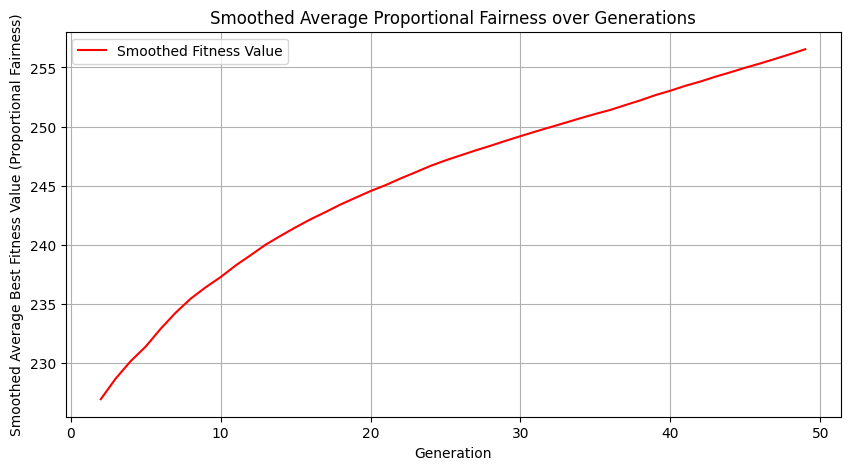

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from deap import base, creator, tools, algorithms

# Load the channel matrix from CSV file
C_full = pd.read_csv('/content/drive/MyDrive/finalyr/channel_matrix.csv', header=None).values  # Load as a NumPy array
R_full = pd.read_csv('/content/drive/MyDrive/finalyr/reward_matrix.csv', header=None).values    # Load as a NumPy array

# Extract the first 10x10 submatrices
C = C_full[:10, :10]  # Channel matrix (10x10)
R = R_full[:10, :10]  # Reward matrix (10x10)

# Normalize the reward matrix R to the range [0, 1]
R_normalized = R / 100.0

# Define a function to calculate the proportional fairness objective
def calculate_proportional_fairness(C, R):
    P = np.multiply(C, R)
    non_zero_rewards = P[C == 1]

    # Handle the case where non_zero_rewards is empty
    if non_zero_rewards.size == 0:
        print("Warning: No active channels with positive rewards found.")
        return 0  # Return zero or a very small number to avoid NaN

    # Replace zero values in non_zero_rewards with a small positive value to avoid log(0)
    non_zero_rewards = np.where(non_zero_rewards <= 0, 1e-10, non_zero_rewards)

    # Calculate the sum of logarithms for proportional fairness
    return np.sum(np.log(non_zero_rewards))

# Define the fitness function
def fitness(individual):
    R_individual = np.array(individual).reshape(10, 10)  # Reshape to 10x10
    proportional_fairness = calculate_proportional_fairness(C, R_individual * 100)  # Scale back to [1, 100]
    return (proportional_fairness,)

# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.rand)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=10*10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Define the population size and number of generations
population_size = 100
ngen = 50  # Number of generations
num_trials = 20  # Number of trials per generation
cxpb = 0.5  # Crossover probability
mutpb = 0.2  # Mutation probability

# List to store the average best fitness value in each generation
average_fitness_values = []

# Run the genetic algorithm for multiple trials
for trial in range(num_trials):
    # Create a fresh population for each trial
    population = toolbox.population(n=population_size)

    # List to store the best fitness value in each generation for this trial
    fitness_values = []

    # Run the genetic algorithm for the specified number of generations
    for gen in range(ngen):
        # Apply the algorithm for one generation
        algorithms.eaSimple(population, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=1, verbose=False)

        # Get the best fitness value in the current generation
        fits = [ind.fitness.values[0] for ind in population]
        best_fitness = max(fits)
        fitness_values.append(best_fitness)

    # If it's the first trial, initialize average_fitness_values
    if trial == 0:
        average_fitness_values = fitness_values
    else:
        # Accumulate fitness values for averaging later
        average_fitness_values = [avg + fit for avg, fit in zip(average_fitness_values, fitness_values)]

# Average the fitness values across all trials
average_fitness_values = [fit / num_trials for fit in average_fitness_values]

# Function to calculate a simple moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Calculate moving averages
window_size = 3  # You can adjust this for smoother results
smoothed_fitness_values = moving_average(average_fitness_values, window_size)

# Extract the best individual from the last trial
best_individual = tools.selBest(population, k=1)[0]
best_individual_matrix = np.array(best_individual).reshape(10, 10) * 100  # Rescale to [1, 100]

# Calculate the final product matrix and proportional fairness
final_product_matrix = np.multiply(C, best_individual_matrix)
final_proportional_fairness = calculate_proportional_fairness(C, best_individual_matrix)

# Output results
print("Channel matrix C:\n", C)
print("Initial Reward matrix R:\n", R)
print("Optimized Reward matrix R_final (Proportional Fairness - Genetic Algorithm):\n", best_individual_matrix)
print("Final product matrix:\n", final_product_matrix)
print("Final proportional fairness (sum of logs):", final_proportional_fairness)

# Plotting only the smoothed fitness values over generations
plt.figure(figsize=(10, 5))
plt.plot(np.arange(window_size - 1, ngen), smoothed_fitness_values, label='Smoothed Fitness Value', color='red')
plt.title('Smoothed Average Proportional Fairness over Generations')
plt.xlabel('Generation')
plt.ylabel('Smoothed Average Best Fitness Value (Proportional Fairness)')
plt.grid(True)
plt.legend()
plt.show()


## 10 * 10

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Channel matrix C:
 [[0 1 0 0 0 1 0 0 0 1]
 [0 1 1 1 1 1 1 1 1 0]
 [0 1 0 0 1 0 1 1 1 0]
 [0 0 0 1 1 0 1 1 1 1]
 [1 1 0 0 1 1 1 1 1 1]
 [0 0 0 1 0 0 1 0 1 1]
 [0 1 1 1 0 0 0 1 1 1]
 [1 1 0 1 0 0 1 1 1 1]
 [0 1 0 0 1 1 1 0 1 0]
 [0 1 1 0 0 1 1 0 0 1]]
Initial Reward matrix R:
 [[51 71 96 48 19  6 84 27 53 48]
 [26 38 38 61 44 86 44 74 62  6]
 [30 54 13 83 29  3 90 58 76  2]
 [15 38 15  5 93 83 54 51 10 12]
 [95 44 31 58 87 53 84 79 23 28]
 [18 47 70 57 93 19 97 65  3 42]
 [49  1 10 47 59 96 62 86 18 46]
 [17  7 13 66  4 10 88 17 52  6]
 [25 12 71 39 17 45 11 70 23 91]
 [91 36 75 82 65 63 99 35 31 28]]
Optimized Reward matrix R_final (Proportional Fairness - Genetic Algorithm):
 [[ 58.23040733 106.86775004   7.2154286  103.76633404  92.92968407
   84.71357107  60.38957376  89.22506319  22.55407805  80.76774516]
 [ -2.57298656  88.43666216  72.17482575  83.05643876 112.2878845
   88.36152742  90.8640581   63.55766454 109.07507898  37.26302191]
 [ 71.01858142 113.5395225  100.06667821  95.3

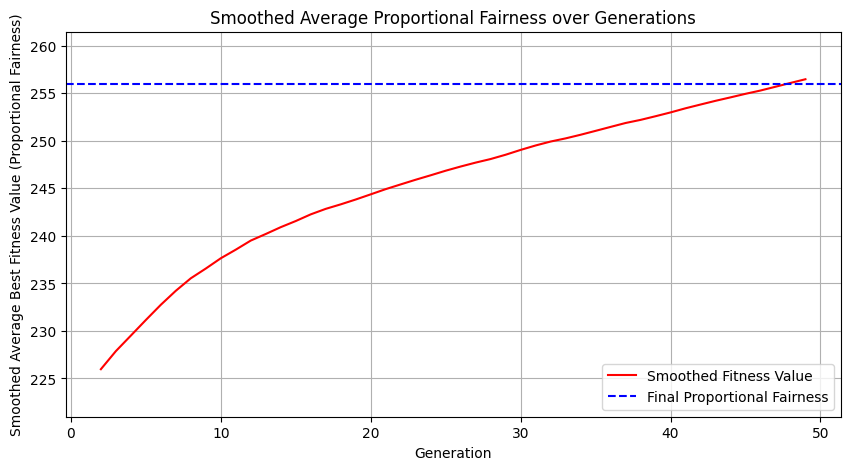

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from deap import base, creator, tools, algorithms

# Load the channel matrix from CSV file
C_full = pd.read_csv('/content/drive/MyDrive/finalyr/channel_matrix.csv', header=None).values  # Load as a NumPy array
R_full = pd.read_csv('/content/drive/MyDrive/finalyr/reward_matrix.csv', header=None).values    # Load as a NumPy array

# Extract the first 10x10 submatrices
C = C_full[:10, :10]  # Channel matrix (10x10)
R = R_full[:10, :10]  # Reward matrix (10x10)

# Define a function to calculate the proportional fairness objective
def calculate_proportional_fairness(C, R):
    P = np.multiply(C, R)
    non_zero_rewards = P[C == 1]

    # Handle the case where non_zero_rewards is empty
    if non_zero_rewards.size == 0:
        print("Warning: No active channels with positive rewards found.")
        return 0  # Return zero or a very small number to avoid NaN

    # Replace zero values in non_zero_rewards with a small positive value to avoid log(0)
    non_zero_rewards = np.where(non_zero_rewards <= 0, 1e-10, non_zero_rewards)

    # Calculate the sum of logarithms for proportional fairness
    return np.sum(np.log(non_zero_rewards))

# Define the fitness function
def fitness(individual):
    R_individual = np.array(individual).reshape(10, 10)  # Reshape to 10x10
    proportional_fairness = calculate_proportional_fairness(C, R_individual * 100)  # Scale back to [1, 100]
    return (proportional_fairness,)

# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.rand)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=10*10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Define the population size and number of generations
population_size = 100
ngen = 50  # Number of generations
num_trials = 20  # Number of trials per generation
cxpb = 0.5  # Crossover probability
mutpb = 0.2  # Mutation probability

# List to store the average best fitness value in each generation
average_fitness_values = []

# Run the genetic algorithm for multiple trials
for trial in range(num_trials):
    # Create a fresh population for each trial
    population = toolbox.population(n=population_size)

    # List to store the best fitness value in each generation for this trial
    fitness_values = []

    # Run the genetic algorithm for the specified number of generations
    for gen in range(ngen):
        # Apply the algorithm for one generation
        algorithms.eaSimple(population, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=1, verbose=False)

        # Get the best fitness value in the current generation
        fits = [ind.fitness.values[0] for ind in population]
        best_fitness = max(fits)
        fitness_values.append(best_fitness)

    # If it's the first trial, initialize average_fitness_values
    if trial == 0:
        average_fitness_values = fitness_values
    else:
        # Accumulate fitness values for averaging later
        average_fitness_values = [avg + fit for avg, fit in zip(average_fitness_values, fitness_values)]

# Average the fitness values across all trials
average_fitness_values = [fit / num_trials for fit in average_fitness_values]

# Function to calculate a simple moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Calculate moving averages
window_size = 3  # You can adjust this for smoother results
smoothed_fitness_values = moving_average(average_fitness_values, window_size)

# Extract the best individual from the last trial
best_individual = tools.selBest(population, k=1)[0]
best_individual_matrix = np.array(best_individual).reshape(10, 10) * 100  # Rescale to [1, 100]

# Calculate the final product matrix and proportional fairness
final_product_matrix = np.multiply(C, best_individual_matrix)
final_proportional_fairness = calculate_proportional_fairness(C, best_individual_matrix)

# Output results
print("Channel matrix C:\n", C)
print("Initial Reward matrix R:\n", R)
print("Optimized Reward matrix R_final (Proportional Fairness - Genetic Algorithm):\n", best_individual_matrix)
print("Final product matrix:\n", final_product_matrix)
print("Final proportional fairness (sum of logs):", final_proportional_fairness)

# Plotting the average fitness values over generations with smoothing
plt.figure(figsize=(10, 5))
plt.plot(np.arange(window_size - 1, ngen), smoothed_fitness_values, label='Smoothed Fitness Value', color='red')

# Adding the final proportional fairness as a horizontal line
plt.axhline(y=final_proportional_fairness, color='blue', linestyle='--', label='Final Proportional Fairness')

# Adjust y-limits to include the range of the average fitness values properly
plt.ylim(bottom=min(smoothed_fitness_values) - 5, top=max(smoothed_fitness_values) + 5)

plt.title('Smoothed Average Proportional Fairness over Generations')
plt.xlabel('Generation')
plt.ylabel('Smoothed Average Best Fitness Value (Proportional Fairness)')
plt.grid(True)
plt.legend()
plt.show()


## 15 * 15

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Channel matrix C:
 [[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1]
 [0 1 1 1 1 1 1 1 1 0 1 0 1 1 0]
 [0 1 0 0 1 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 1 1 1 1 0 1 0 0]
 [1 1 0 0 1 1 1 1 1 1 0 1 1 0 0]
 [0 0 0 1 0 0 1 0 1 1 0 1 0 1 1]
 [0 1 1 1 0 0 0 1 1 1 0 1 1 1 1]
 [1 1 0 1 0 0 1 1 1 1 0 1 0 1 1]
 [0 1 0 0 1 1 1 0 1 0 0 0 0 1 1]
 [0 1 1 0 0 1 1 0 0 1 0 0 0 1 1]
 [1 0 0 0 0 0 1 0 1 1 0 0 1 0 0]
 [0 1 1 0 1 1 0 1 1 0 0 0 1 0 0]
 [0 1 1 1 0 1 0 1 0 0 0 1 1 1 1]
 [0 1 0 1 1 0 1 1 0 1 0 1 0 0 1]
 [0 0 0 1 1 1 1 0 0 1 1 1 0 1 1]]
Initial Reward matrix R:
 [[ 51  71  96  48  19   6  84  27  53  48   7  59  69  11  15]
 [ 26  38  38  61  44  86  44  74  62   6  17  51  38  24  51]
 [ 30  54  13  83  29   3  90  58  76   2  75  28  82  77  86]
 [ 15  38  15   5  93  83  54  51  10  12   4  95  18  80  36]
 [ 95  44  31  58  87  53  84  79  23  28  16  37  21  79  17]
 [ 18  47  70  57  93  19  97  65   3  42  21  99  40  67  25]
 [ 49   1  10  47  59  96  62  86  18  46  32  27  92  18  39]
 [ 17   7  13  66 

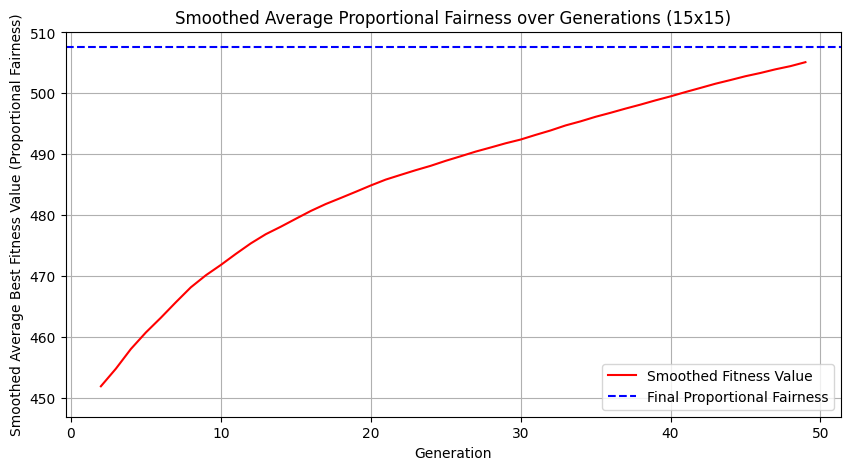

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from deap import base, creator, tools, algorithms

# Load the channel matrix from CSV file
C_full = pd.read_csv('/content/drive/MyDrive/finalyr/channel_matrix.csv', header=None).values  # Load as a NumPy array
R_full = pd.read_csv('/content/drive/MyDrive/finalyr/reward_matrix.csv', header=None).values    # Load as a NumPy array

# Extract the first 15x15 submatrices
C = C_full[:15, :15]  # Channel matrix (15x15)
R = R_full[:15, :15]  # Reward matrix (15x15)

# Define a function to calculate the proportional fairness objective
def calculate_proportional_fairness(C, R):
    P = np.multiply(C, R)
    non_zero_rewards = P[C == 1]

    # Handle the case where non_zero_rewards is empty
    if non_zero_rewards.size == 0:
        print("Warning: No active channels with positive rewards found.")
        return 0  # Return zero or a very small number to avoid NaN

    # Replace zero values in non_zero_rewards with a small positive value to avoid log(0)
    non_zero_rewards = np.where(non_zero_rewards <= 0, 1e-10, non_zero_rewards)

    # Calculate the sum of logarithms for proportional fairness
    return np.sum(np.log(non_zero_rewards))

# Define the fitness function
def fitness(individual):
    R_individual = np.array(individual).reshape(15, 15)  # Reshape to 15x15
    proportional_fairness = calculate_proportional_fairness(C, R_individual * 100)  # Scale back to [1, 100]
    return (proportional_fairness,)

# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.rand)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=15*15)  # Change to 15*15
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Define the population size and number of generations
population_size = 100
ngen = 50  # Number of generations
num_trials = 20  # Number of trials per generation
cxpb = 0.5  # Crossover probability
mutpb = 0.2  # Mutation probability

# List to store the average best fitness value in each generation
average_fitness_values = []

# Run the genetic algorithm for multiple trials
for trial in range(num_trials):
    # Create a fresh population for each trial
    population = toolbox.population(n=population_size)

    # List to store the best fitness value in each generation for this trial
    fitness_values = []

    # Run the genetic algorithm for the specified number of generations
    for gen in range(ngen):
        # Apply the algorithm for one generation
        algorithms.eaSimple(population, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=1, verbose=False)

        # Get the best fitness value in the current generation
        fits = [ind.fitness.values[0] for ind in population]
        best_fitness = max(fits)
        fitness_values.append(best_fitness)

    # If it's the first trial, initialize average_fitness_values
    if trial == 0:
        average_fitness_values = fitness_values
    else:
        # Accumulate fitness values for averaging later
        average_fitness_values = [avg + fit for avg, fit in zip(average_fitness_values, fitness_values)]

# Average the fitness values across all trials
average_fitness_values = [fit / num_trials for fit in average_fitness_values]

# Function to calculate a simple moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Calculate moving averages
window_size = 3  # You can adjust this for smoother results
smoothed_fitness_values = moving_average(average_fitness_values, window_size)

# Extract the best individual from the last trial
best_individual = tools.selBest(population, k=1)[0]
best_individual_matrix = np.array(best_individual).reshape(15, 15) * 100  # Rescale to [1, 100]

# Calculate the final product matrix and proportional fairness
final_product_matrix = np.multiply(C, best_individual_matrix)
final_proportional_fairness = calculate_proportional_fairness(C, best_individual_matrix)

# Output results
print("Channel matrix C:\n", C)
print("Initial Reward matrix R:\n", R)
print("Optimized Reward matrix R_final (Proportional Fairness - Genetic Algorithm):\n", best_individual_matrix)
print("Final product matrix:\n", final_product_matrix)
print("Final proportional fairness (sum of logs):", final_proportional_fairness)

# Plotting the average fitness values over generations with smoothing
plt.figure(figsize=(10, 5))
plt.plot(np.arange(window_size - 1, ngen), smoothed_fitness_values, label='Smoothed Fitness Value', color='red')

# Adding the final proportional fairness as a horizontal line
plt.axhline(y=final_proportional_fairness, color='blue', linestyle='--', label='Final Proportional Fairness')

# Adjust y-limits to include the range of the average fitness values properly
plt.ylim(bottom=min(smoothed_fitness_values) - 5, top=max(smoothed_fitness_values) + 5)

plt.title('Smoothed Average Proportional Fairness over Generations (15x15)')
plt.xlabel('Generation')
plt.ylabel('Smoothed Average Best Fitness Value (Proportional Fairness)')
plt.grid(True)
plt.legend()
plt.show()


## 20 * 20

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Channel matrix C:
 [[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0]
 [0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1]
 [1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1]
 [0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1]
 [0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0]
 [1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1]
 [0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0]
 [0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0]
 [0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1]
 [0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0]
 [0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0]
 [0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0]
 [0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0]
 [1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0]
 [0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0]
 [1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0]]
Initial Reward matrix R:
 [[ 51  71  96  48  19   6  84  27  53  48   7  59  69  11  15  64   3  69
   23  53]
 [ 26  38

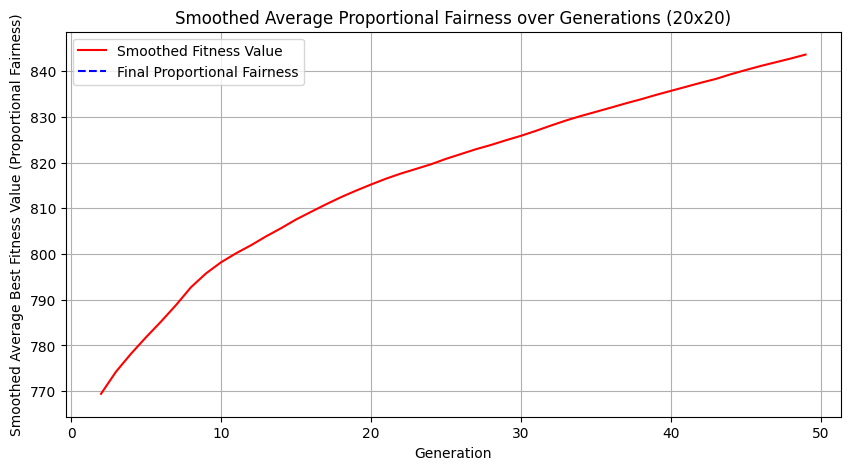

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from deap import base, creator, tools, algorithms

# Load the channel matrix from CSV file
C_full = pd.read_csv('/content/drive/MyDrive/finalyr/channel_matrix.csv', header=None).values  # Load as a NumPy array
R_full = pd.read_csv('/content/drive/MyDrive/finalyr/reward_matrix.csv', header=None).values    # Load as a NumPy array

# Extract the first 20x20 submatrices
C = C_full[:20, :20]  # Channel matrix (20x20)
R = R_full[:20, :20]  # Reward matrix (20x20)

# Define a function to calculate the proportional fairness objective
def calculate_proportional_fairness(C, R):
    P = np.multiply(C, R)
    non_zero_rewards = P[C == 1]

    # Handle the case where non_zero_rewards is empty
    if non_zero_rewards.size == 0:
        print("Warning: No active channels with positive rewards found.")
        return 0  # Return zero or a very small number to avoid NaN

    # Replace zero values in non_zero_rewards with a small positive value to avoid log(0)
    non_zero_rewards = np.where(non_zero_rewards <= 0, 1e-10, non_zero_rewards)

    # Calculate the sum of logarithms for proportional fairness
    return np.sum(np.log(non_zero_rewards))

# Define the fitness function
def fitness(individual):
    R_individual = np.array(individual).reshape(20, 20)  # Reshape to 20x20
    proportional_fairness = calculate_proportional_fairness(C, R_individual * 100)  # Scale back to [1, 100]
    return (proportional_fairness,)

# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.rand)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=20*20)  # Change to 20*20
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Define the population size and number of generations
population_size = 100
ngen = 50  # Number of generations
num_trials = 20  # Number of trials per generation
cxpb = 0.5  # Crossover probability
mutpb = 0.2  # Mutation probability

# List to store the average best fitness value in each generation
average_fitness_values = []

# Run the genetic algorithm for multiple trials
for trial in range(num_trials):
    # Create a fresh population for each trial
    population = toolbox.population(n=population_size)

    # List to store the best fitness value in each generation for this trial
    fitness_values = []

    # Run the genetic algorithm for the specified number of generations
    for gen in range(ngen):
        # Apply the algorithm for one generation
        algorithms.eaSimple(population, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=1, verbose=False)

        # Get the best fitness value in the current generation
        fits = [ind.fitness.values[0] for ind in population]
        best_fitness = max(fits)
        fitness_values.append(best_fitness)

    # If it's the first trial, initialize average_fitness_values
    if trial == 0:
        average_fitness_values = fitness_values
    else:
        # Accumulate fitness values for averaging later
        average_fitness_values = [avg + fit for avg, fit in zip(average_fitness_values, fitness_values)]

# Average the fitness values across all trials
average_fitness_values = [fit / num_trials for fit in average_fitness_values]

# Function to calculate a simple moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Calculate moving averages
window_size = 3  # You can adjust this for smoother results
smoothed_fitness_values = moving_average(average_fitness_values, window_size)

# Extract the best individual from the last trial
best_individual = tools.selBest(population, k=1)[0]
best_individual_matrix = np.array(best_individual).reshape(20, 20) * 100  # Rescale to [1, 100]

# Calculate the final product matrix and proportional fairness
final_product_matrix = np.multiply(C, best_individual_matrix)
final_proportional_fairness = calculate_proportional_fairness(C, best_individual_matrix)

# Output results
print("Channel matrix C:\n", C)
print("Initial Reward matrix R:\n", R)
print("Optimized Reward matrix R_final (Proportional Fairness - Genetic Algorithm):\n", best_individual_matrix)
print("Final product matrix:\n", final_product_matrix)
print("Final proportional fairness (sum of logs):", final_proportional_fairness)

# Plotting the average fitness values over generations with smoothing
plt.figure(figsize=(10, 5))
plt.plot(np.arange(window_size - 1, ngen), smoothed_fitness_values, label='Smoothed Fitness Value', color='red')

# Adding the final proportional fairness as a horizontal line
plt.axhline(y=final_proportional_fairness, color='blue', linestyle='--', label='Final Proportional Fairness')

# Adjust y-limits to include the range of the average fitness values properly
plt.ylim(bottom=min(smoothed_fitness_values) - 5, top=max(smoothed_fitness_values) + 5)

plt.title('Smoothed Average Proportional Fairness over Generations (20x20)')
plt.xlabel('Generation')
plt.ylabel('Smoothed Average Best Fitness Value (Proportional Fairness)')
plt.grid(True)
plt.legend()
plt.show()


In [3]:
pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


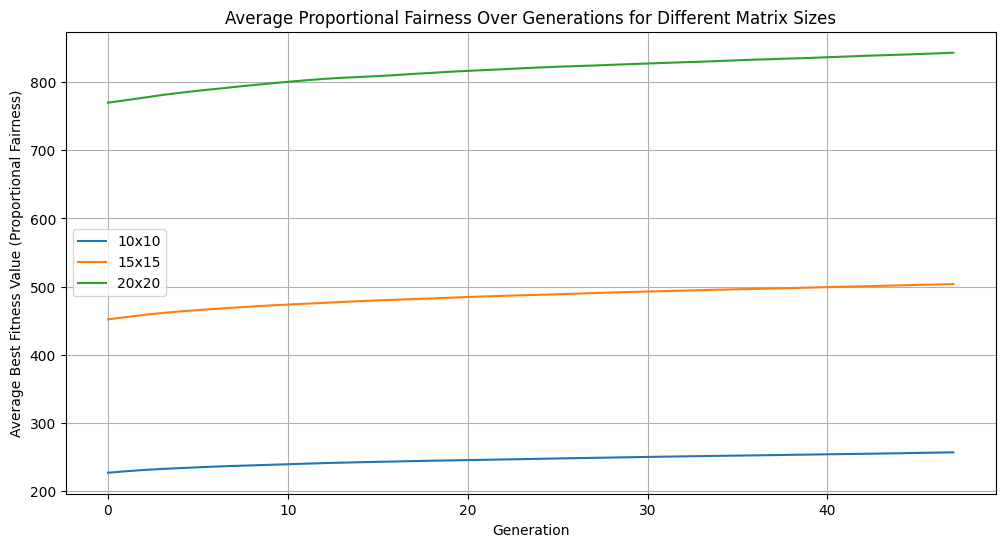

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from deap import base, creator, tools, algorithms

# Load the channel and reward matrices from CSV files
C_full = pd.read_csv('/content/drive/MyDrive/finalyr/channel_matrix.csv', header=None).values  # Load as a NumPy array
R_full = pd.read_csv('/content/drive/MyDrive/finalyr/reward_matrix.csv', header=None).values    # Load as a NumPy array

# Function to calculate proportional fairness
def calculate_proportional_fairness(C, R):
    P = np.multiply(C, R)
    non_zero_rewards = P[C == 1]

    if non_zero_rewards.size == 0:
        return 0  # Return zero to avoid NaN

    non_zero_rewards = np.where(non_zero_rewards <= 0, 1e-10, non_zero_rewards)
    return np.sum(np.log(non_zero_rewards))

# Fitness function
def fitness(individual, C, size):
    R_individual = np.array(individual).reshape(size, size)
    proportional_fairness = calculate_proportional_fairness(C, R_individual * 100)
    return (proportional_fairness,)

# Genetic Algorithm setup
def run_genetic_algorithm(size, population_size=100, ngen=50, num_trials=20):
    # Define matrices for the specific size
    C = C_full[:size, :size]  # Channel matrix
    R = R_full[:size, :size]  # Reward matrix

    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=size*size)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    # Modify evaluate to pass C and size to fitness
    toolbox.register("evaluate", lambda ind: fitness(ind, C, size))
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    average_fitness_values = []

    for trial in range(num_trials):
        population = toolbox.population(n=population_size)
        fitness_values = []

        for gen in range(ngen):
            algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=1, verbose=False)
            fits = [ind.fitness.values[0] for ind in population]
            best_fitness = max(fits)
            fitness_values.append(best_fitness)

        if trial == 0:
            average_fitness_values = fitness_values
        else:
            average_fitness_values = [avg + fit for avg, fit in zip(average_fitness_values, fitness_values)]

    average_fitness_values = [fit / num_trials for fit in average_fitness_values]
    return average_fitness_values

# Sizes to run the genetic algorithm for
sizes = [10, 15, 20]
average_fitness_results = {}

# Run the genetic algorithm for different sizes
for size in sizes:
    avg_fitness = run_genetic_algorithm(size)
    average_fitness_results[size] = avg_fitness

# Function to calculate a simple moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Plotting the results
plt.figure(figsize=(12, 6))
for size, fitness_values in average_fitness_results.items():
    smoothed_fitness_values = moving_average(fitness_values, window_size=3)
    plt.plot(np.arange(len(smoothed_fitness_values)), smoothed_fitness_values, label=f'{size}x{size}')

plt.title('Average Proportional Fairness Over Generations for Different Matrix Sizes')
plt.xlabel('Generation')
plt.ylabel('Average Best Fitness Value (Proportional Fairness)')
plt.grid(True)
plt.legend()
plt.show()
